CS437 Lab 04 - Vehicle Emissions Visualizations from AWS IoT Analytics

When loading data from IoT Analytics datasets, the client should be initialized first:

In [181]:
import boto3
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.dates import DateFormatter
from pandas.plotting import register_matplotlib_converters

# create IoT Analytics client
client = boto3.client('iotanalytics')

In [182]:
TIMEZONE = 'US/EASTERN'
DATETIME_FORMAT = '%y-%m-%d %H:%M:%S'

In [183]:
def parse(x):
    x = pd.to_datetime(x, infer_datetime_format=True, unit='s', utc=True)
    x = x.tz_convert(TIMEZONE)
    return x

In [184]:
dataset = "data"
dataset_url = client.get_dataset_content(datasetName = dataset)['entries'][0]['dataURI']

In [201]:
df = pd.read_csv(dataset_url)
df = df.drop(columns='__dt')
df = df.sort_values(by='timestamp', ascending=True)

In [202]:
display(df.tail(5))

timestamp  vehicle_co  vehicle_co2  vehiclehc  \
710  2022-04-06 23:07:44.961656       32.84      3693.56       0.23   
711  2022-04-06 23:07:44.961669        0.00         0.00       0.00   
712  2022-04-06 23:07:44.961690        0.00         0.00       0.00   
713  2022-04-06 23:07:44.961702       78.64      5890.25       0.50   
714  2022-04-06 23:07:44.961720        0.00         0.00       0.00   

     vehicle_nox  vehicle_pmx  vehicle_angle  vehicle_fuel  vehicle_noise  \
710         1.38         0.05         359.46          1.59          64.71   
711         0.00         0.00         359.46          0.00          60.11   
712         0.00         0.00           0.53          0.00          62.34   
713         2.42         0.11           0.53          2.53          66.98   
714         0.00         0.00           0.53          0.00          60.95   

     vehicle_pos  vehicle_speed  vehicle_x  vehicle_y  vehicle_id  
710       134.12          12.26   26715.76   26030.74           3  
711       145.22          11.10   26715.66   26041.84           3  
712       156.25          11.03   26715.71   26052.87           3  
713       168.44          12.19   26715.82   26065.06           3  
714       179.82          11.38   26715.92   26076.44           3

In [203]:
groups = df.groupby('vehicle_id')

In [204]:
print('DataFrame Stats')
print('---------------')
print('Record count: {:,}'.format(df['vehicle_co'].count()))

DataFrame Stats
---------------
Record count: 1,028


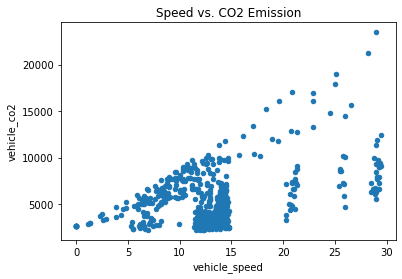

In [205]:
ax = plt.gca()
df1 = df[df['vehicle_co2'] != 0]
df1.plot(kind='scatter', title='Speed vs. CO2 Emission', x='vehicle_speed', y='vehicle_co2', ax=ax)

plt.show()

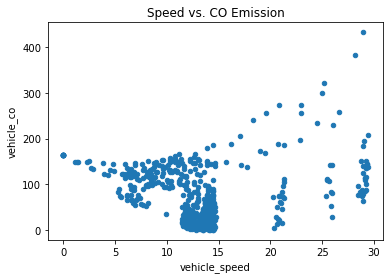

In [206]:
ax = plt.gca()
df2 = df[df['vehicle_co'] != 0]
df2.plot(kind='scatter', title='Speed vs. CO Emission', x='vehicle_speed', y='vehicle_co', ax=ax)

plt.show()

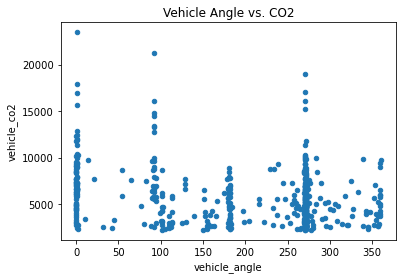

In [207]:
ax = plt.gca()
df3 = df[df['vehicle_co2'] != 0]
df3.plot(kind='scatter', title='Vehicle Angle vs. CO2', x='vehicle_angle', y='vehicle_co2', ax=ax)

plt.show()

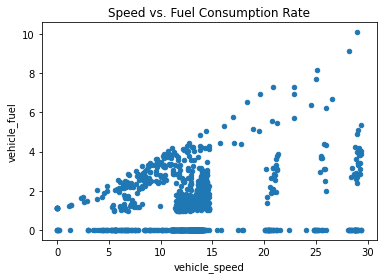

In [208]:
ax = plt.gca()
df.plot(kind='scatter', title='Speed vs. Fuel Consumption Rate', x='vehicle_speed', y='vehicle_fuel', ax=ax)

plt.show()

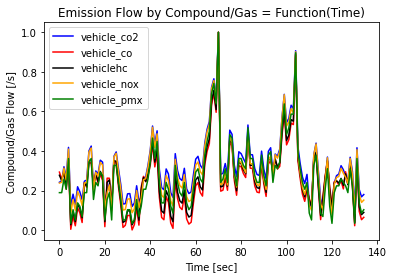

In [212]:
# Remove Outliers
df4 = df[df['vehicle_id'] == 0]
df4 = df4[df4['vehicle_co2'] != 0]
df4 = df4[df4['vehicle_co'] != 0]
df4 = df4[df4['vehiclehc'] != 0]
df4 = df4[df4['vehicle_nox'] != 0]
df4 = df4[df4['vehicle_pmx'] != 0]

# Sort and Reset Index
df_sorted = df4.sort_values(by='timestamp', ascending=True).reset_index(drop=True)

# Copy
df_max_scaled_sorted = df_sorted.copy()
  
# apply normalization techniques
for column in df_max_scaled_sorted.columns[1:]:
    df_max_scaled_sorted[column] = df_max_scaled_sorted[column]  / df_max_scaled_sorted[column].abs().max()

ax = plt.gca()
ax.set_xlabel("Time [sec]")
ax.set_ylabel("Compound/Gas Flow [/s]")

df_max_scaled_sorted.plot(kind='line', title='Emission Flow by Compound/Gas = Function(Time)', y='vehicle_co2', ax=ax, color='blue')
df_max_scaled_sorted.plot(kind='line', y='vehicle_co', ax=ax, color='red')
df_max_scaled_sorted.plot(kind='line', y='vehiclehc', ax=ax, color='black')
df_max_scaled_sorted.plot(kind='line', y='vehicle_nox', ax=ax, color='orange')
df_max_scaled_sorted.plot(kind='line', y='vehicle_pmx', ax=ax, color='green')
plt.show()

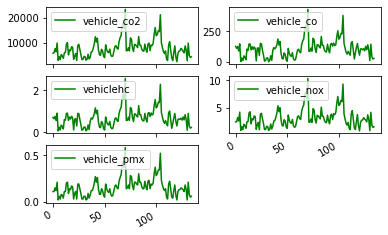

In [213]:
# Remove Outliers
df5 = df[df['vehicle_id'] == 0]
df5 = df5[df5['vehicle_co2'] != 0]
df5 = df5[df5['vehicle_co'] != 0]
df5 = df5[df5['vehiclehc'] != 0]
df5 = df5[df5['vehicle_nox'] != 0]
df5 = df5[df5['vehicle_pmx'] != 0]

# Sort and Reset Index
df_sorted = df5.sort_values(by='timestamp', ascending=True).reset_index(drop=True)

# Drop Unwanted Columns
df_sorted = pd.DataFrame(df_sorted, columns=['vehicle_co2', 'vehicle_co', 'vehiclehc', 'vehicle_nox', 'vehicle_pmx'])

df_sorted.plot(kind='line', subplots=True, layout=(3,2), color='green')
plt.show()